# Final Stage Development Tests

In [8]:
# General Modules
import numpy as np
import pickle
import warnings

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


warnings.filterwarnings('ignore')

Functions used:

In [9]:
def print_results(results):
    # Split results into variables
    accuracy_list, loss_list, f1_list, weighted_accuracy_list, training_accuracy_list, validation_accuracy_list = results[0:6]

    # Gets peak training and validation accuracy values for each fold 
    max_training_accuracy_list = [max(sublist) for sublist in training_accuracy_list]
    max_validation_accuracy_list = [max(sublist) for sublist in validation_accuracy_list]

    # Average and Standard Deviation for Metrics
    avg_accuracy = np.mean(accuracy_list)
    std_accuracy = np.std(accuracy_list)

    avg_loss = np.mean(loss_list)
    std_loss = np.std(loss_list)

    avg_f1 = np.mean(f1_list)
    std_f1 = np.std(f1_list)

    avg_weighted_accuracy = np.mean(weighted_accuracy_list)
    std_weighted_accuracy = np.std(weighted_accuracy_list)

    avg_training_accuracy = np.mean(max_training_accuracy_list)
    std_training_accuracy = np.std(max_training_accuracy_list)

    avg_validation_accuracy = np.mean(max_validation_accuracy_list)
    std_validation_accuracy = np.std(max_validation_accuracy_list)


    # Print Final Metrics Across All Folds (4 decimal)
    print("\nFinal Metrics Across All Folds:\n\n")

    print("Loss and F1 score: \n")
    print(f"Average Loss: {avg_loss:.4f}")
    print(f"Loss Standard Deviation: {std_loss:.4f}")

    print(f"Average F1 Score (Weighted): {avg_f1:.4f}")
    print(f"F1 Score Standard Deviation: {std_f1:.4f}")

    print("\nAccuracies: \n")
    print(f"Average Training Accuracy: {avg_training_accuracy:.4f}")
    print(f"Training Accuracy Standard Deviation: {std_training_accuracy:.4f}")

    print(f"Average Validation Accuracy: {avg_validation_accuracy:.4f}")
    print(f"Training Validation Standard Deviation: {std_validation_accuracy:.4f}")

    print(f"Average Test Accuracy: {avg_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")

    print(f"Average Weighted Accuracy: {avg_weighted_accuracy:.4f}")
    print(f"Weighted Accuracy Standard Deviation: {std_weighted_accuracy:.4f}")
    

    return accuracy_list, weighted_accuracy_list

In [10]:
def show_weighted(accuracy_list, weighted_accuracy_list):
    # Used to plot both side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot for accuracy
    axes[0].boxplot(accuracy_list)
    axes[0].set_title('Accuracy Distribution Across Folds')
    axes[0].set_ylabel('Accuracy')

    # Boxplot for weighted accuracy
    axes[1].boxplot(weighted_accuracy_list)
    axes[1].set_title('Weighted Accuracy Distribution Across Folds')
    axes[1].set_ylabel('Accuracy')

    # Display the plots side by side
    plt.tight_layout()
    plt.show()

In [11]:
CLASSLABELS = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

def plot_aggregated_confusion_matrix(confusion_matrix_list):
    # Aggregate all confusion matrices by summing them element-wise
    total_cm = np.sum(confusion_matrix_list, axis=0)

    # Plot the aggregated confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=CLASSLABELS, yticklabels=CLASSLABELS)
    plt.title('Aggregated Confusion Matrix (All Folds)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [12]:
def training_vs_validation(results):

    training_acc, weighted_acc, val_acc = results[4], results[3], results[5]

    # Define the number of folds based on the lists
    num_folds = len(training_acc)

    # Create subplots based on the number of folds
    fig, ax = plt.subplots(num_folds, 1, figsize=(10, 5 * num_folds))

    # If there's only one fold, ax won't be iterable, so wrap it in a list for consistency
    if num_folds == 1:
        ax = [ax]

    # Iterate over each fold to plot respective values
    for i in range(num_folds):
        ax[i].plot(training_acc[i], 'co-', label='Training Accuracy')
        ax[i].plot(weighted_acc[i], 'go-', label='Weighted Accuracy')
        ax[i].plot(val_acc[i], 'mo-', label='Validation Accuracy')
        ax[i].set_title(f'Accuracy Metrics for Fold {i + 1}')
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Accuracy')
        ax[i].legend()

    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.show()

### DROPOUT = 0.4 | LR = 0.0005 | EarlyStop patience = 10 | ReduceLR patience = 5

In [13]:
# Load the 2D array from the pickle file
with open('./pickle_jar/results_0005.pkl', 'rb') as file:
    results = pickle.load(file)

confusion_matrix_list = results[6]
                                                                                                                   
predictions_list, true_y_list = results[7:9]

accuracy_list, weighted_accuracy_list = print_results(results)


Final Metrics Across All Folds:


Loss and F1 score: 

Average Loss: 1.6146
Loss Standard Deviation: 0.0963
Average F1 Score (Weighted): 0.4817
F1 Score Standard Deviation: 0.0346

Accuracies: 

Average Training Accuracy: 0.8245
Training Accuracy Standard Deviation: 0.0166
Average Validation Accuracy: 0.5349
Training Validation Standard Deviation: 0.0367
Average Test Accuracy: 0.4875
Test Accuracy Standard Deviation: 0.0302
Average Weighted Accuracy: 0.5050
Weighted Accuracy Standard Deviation: 0.0316


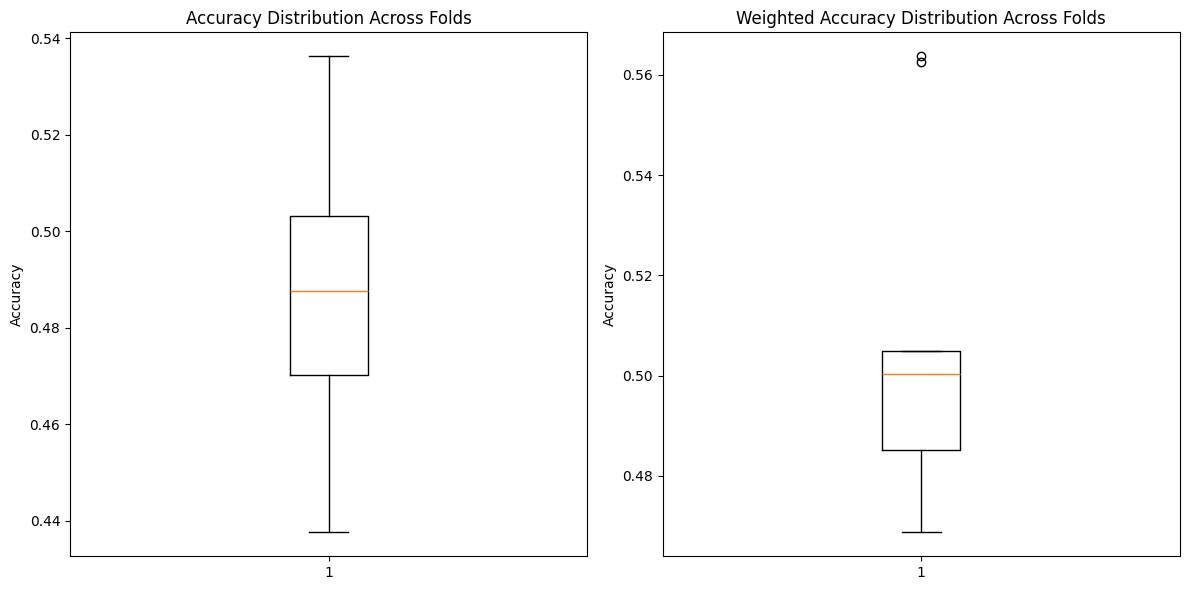

In [14]:
show_weighted(accuracy_list, weighted_accuracy_list)

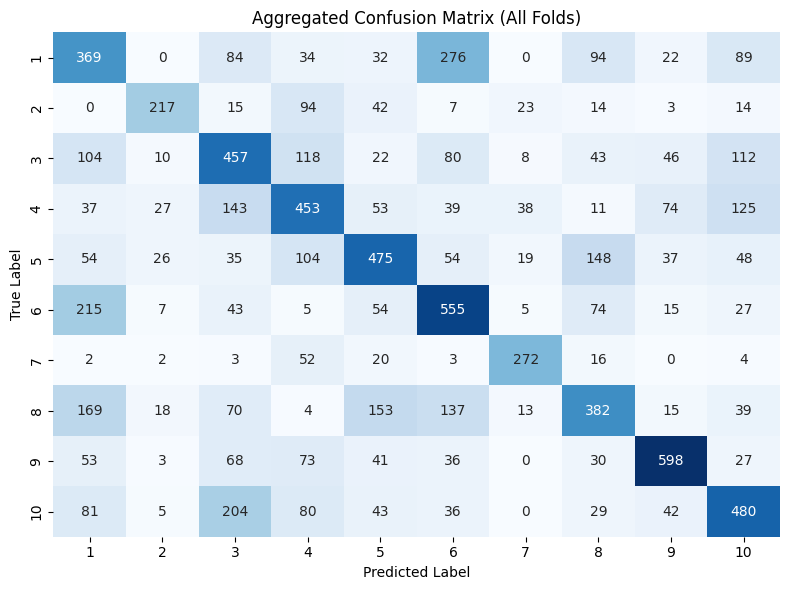

In [15]:
plot_aggregated_confusion_matrix(confusion_matrix_list)

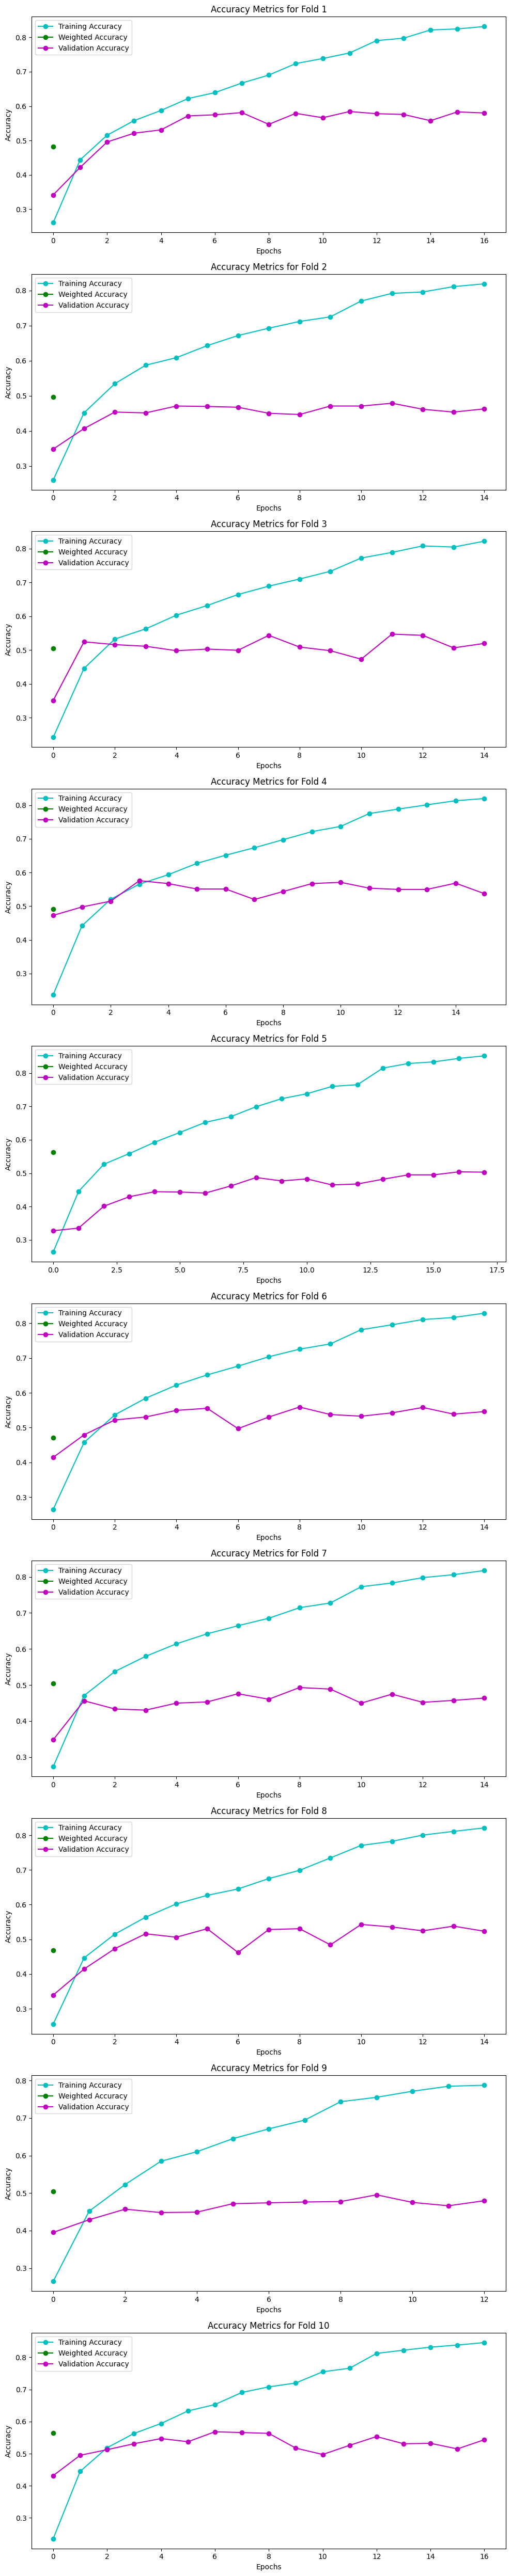

In [16]:
training_vs_validation(results)

### DROPOUT = 0.45 | LR = 0.00025 | EarlyStop patience = 10 | ReduceLR patience = 5


In [ ]:
# Load the 2D array from the pickle file
with open('./pickle_jar/results_00025.pkl', 'rb') as file:
    results = pickle.load(file)

confusion_matrix_list = results[6]
                                                                                                                   
predictions_list, true_y_list = results[7:9]

accuracy_list, weighted_accuracy_list = print_results(results)


Final Metrics Across All Folds:


Loss and F1 score: 

Average Loss: 1.5758
Loss Standard Deviation: 0.1211
Average F1 Score (Weighted): 0.5001
F1 Score Standard Deviation: 0.0323

Accuracies: 

Average Training Accuracy: 0.7568
Training Accuracy Standard Deviation: 0.0214
Average Validation Accuracy: 0.5233
Training Validation Standard Deviation: 0.0306
Average Test Accuracy: 0.5066
Test Accuracy Standard Deviation: 0.0357
Average Weighted Accuracy: 0.5260
Weighted Accuracy Standard Deviation: 0.0396


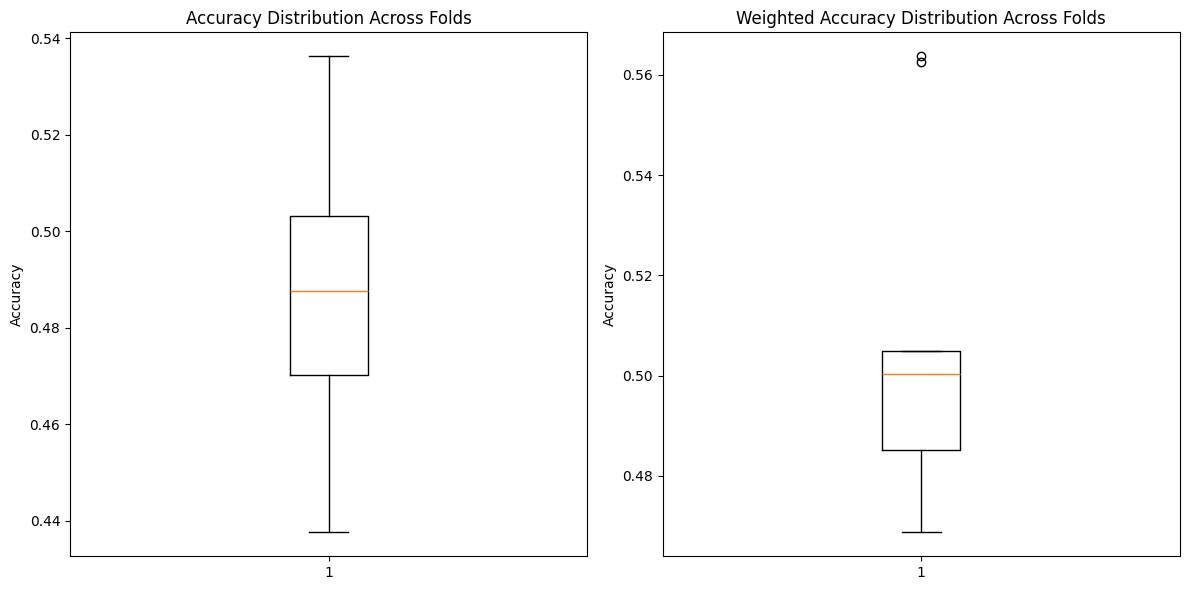

In [17]:
show_weighted(accuracy_list, weighted_accuracy_list)

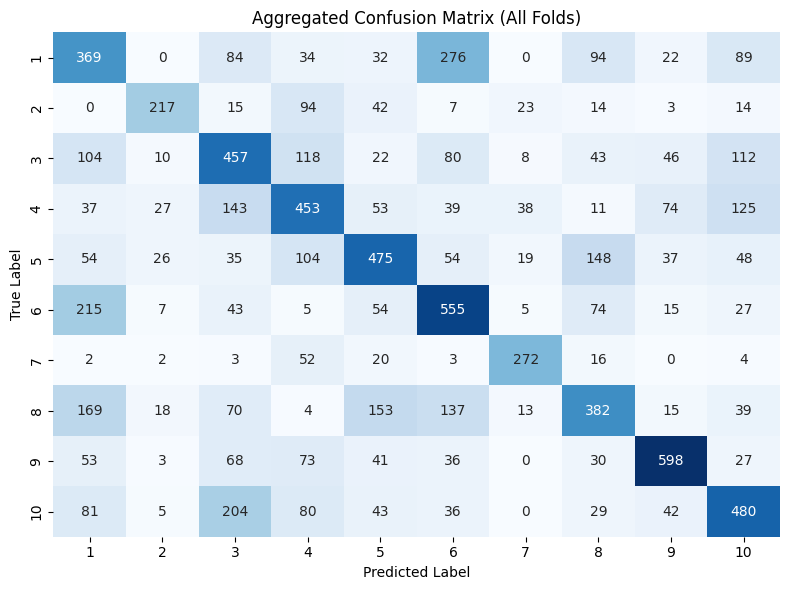

In [18]:
plot_aggregated_confusion_matrix(confusion_matrix_list)

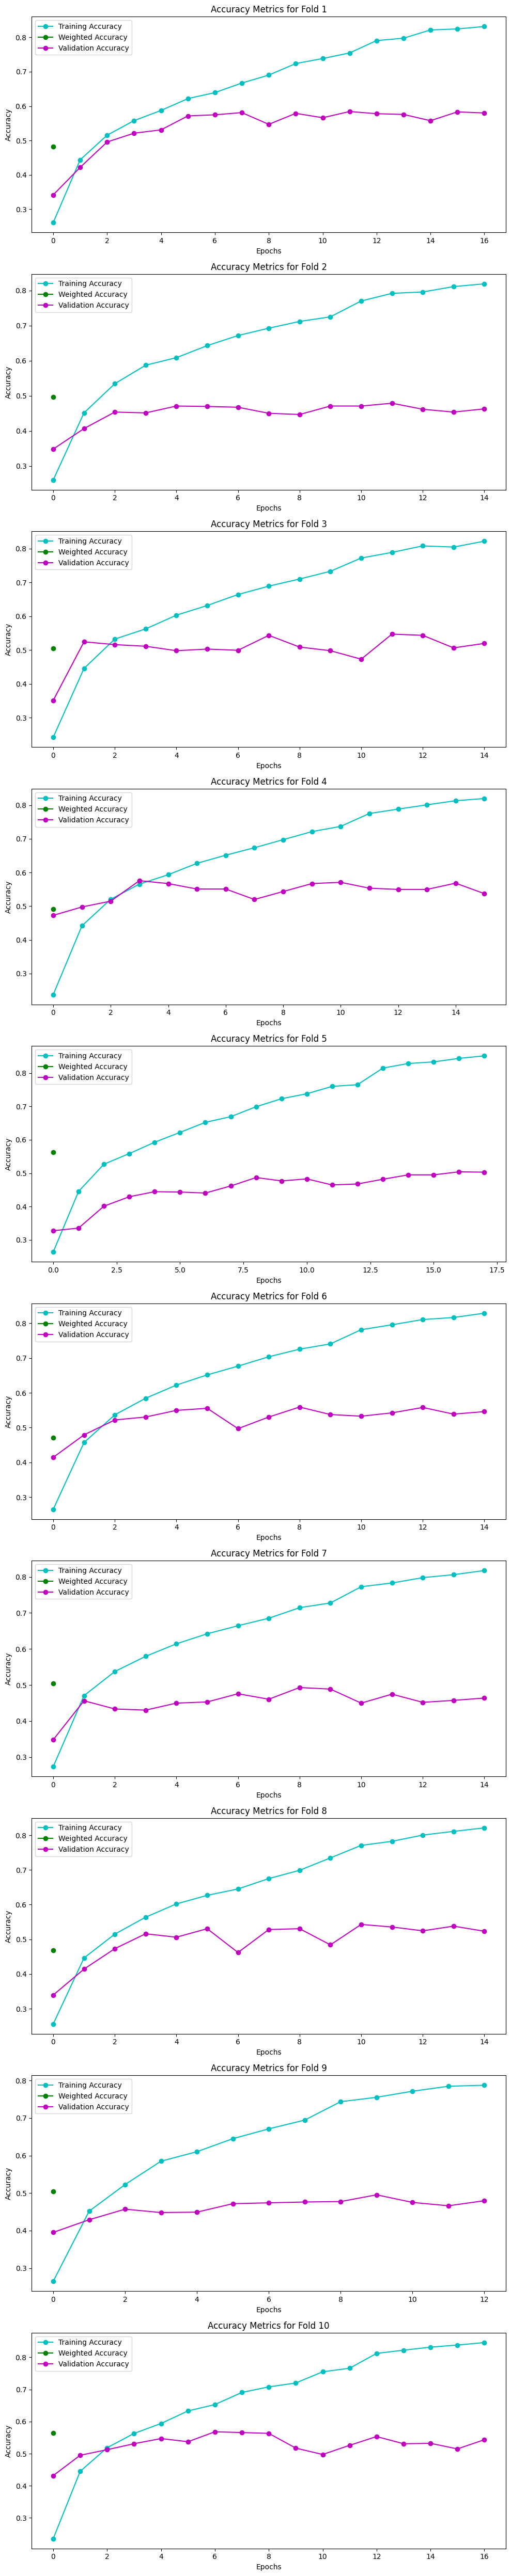

In [19]:
training_vs_validation(results)